In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from pyspark.ml.feature import Imputer, StandardScaler

In [7]:
test = pd.read_csv("/Users/tejalpatel/Desktop/sf-crime/test.csv")
train = pd.read_csv("/Users/tejalpatel/Desktop/sf-crime/train.csv")
submission = pd.read_csv("/Users/tejalpatel/Desktop/sf-crime/sampleSubmission.csv")

In [99]:
test

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
...,...,...,...,...,...,...,...
884257,884257,2003-01-01 00:01:00,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987
884258,884258,2003-01-01 00:01:00,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681
884259,884259,2003-01-01 00:01:00,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075
884260,884260,2003-01-01 00:01:00,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479


In [42]:
train

,Dates,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,n_days
0,2015-05-13 23:53:00,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,4510
1,2015-05-13 23:53:00,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,4510
2,2015-05-13 23:33:00,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,4510
3,2015-05-13 23:30:00,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,4510
4,2015-05-13 23:30:00,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,4510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,0,15,0
878045,2003-01-06 00:01:00,LARCENY/THEFT,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,0,1,0
878046,2003-01-06 00:01:00,LARCENY/THEFT,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,0,1,0
878047,2003-01-06 00:01:00,VANDALISM,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,0,1,0


# Data Types

In [14]:
train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [19]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [20]:
# Check for missing values and then summing up 
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [25]:
train['Dates'] = train['Dates'].astype('datetime64[ns]')
train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['dayofweek'] = train['Dates'].dt.dayofweek
train['hour'] = train['Dates'].dt.hour
train['minute'] = train['Dates'].dt.minute
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30


In [26]:
train['n_days'] = (train['Dates'].dt.date - train['Dates'].dt.date.min()).apply(lambda x: x.days)
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute,n_days
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,4510
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,4510
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,4510
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,4510
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,4510


In [17]:
# Count of unique values in the Category column
train['Category'].value_counts()

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

In [18]:
# Count of unique values in the PdDistrict
train['PdDistrict'].value_counts()
type(train['PdDistrict'].value_counts())
# To convert the result into DF with 'Neighbourhood' as the index and 'Count' as the column
train_crime = train['PdDistrict'].value_counts().reset_index()
train_crime.columns = ['Neighbourhood', 'Count']
train_crime

,Neighbourhood,Count
0,SOUTHERN,157182
1,MISSION,119908
2,NORTHERN,105296
3,BAYVIEW,89431
4,CENTRAL,85460
5,TENDERLOIN,81809
6,INGLESIDE,78845
7,TARAVAL,65596
8,PARK,49313
9,RICHMOND,45209


Text(0.5, 1.0, 'PdDistrict')

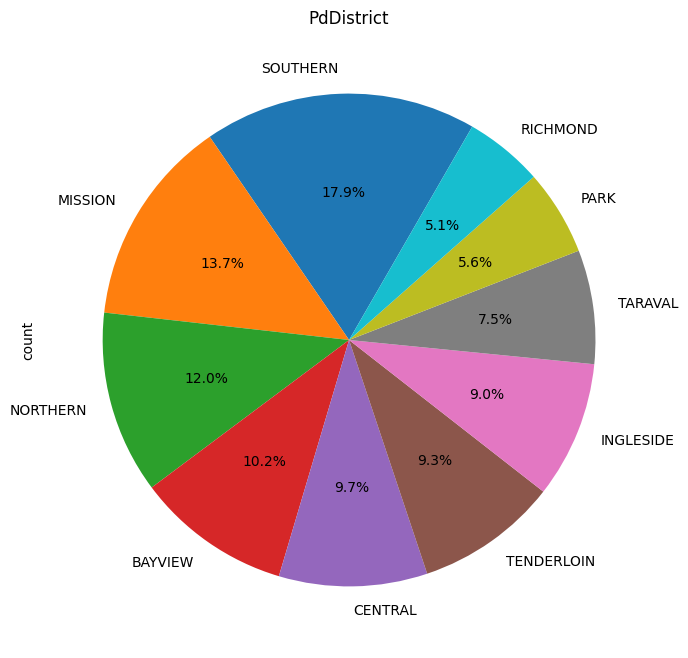

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
explode=(0.1,0.05,0.05)
train['PdDistrict'].value_counts().plot.pie(autopct='%1.1f%%',startangle=60)
plt.title('PdDistrict')

In [28]:
train['PdDistrict'].value_counts()

PdDistrict
SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: count, dtype: int64

In [29]:
pd.value_counts(train['year']).sort_index()

year
2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: count, dtype: int64

<Axes: xlabel='year'>

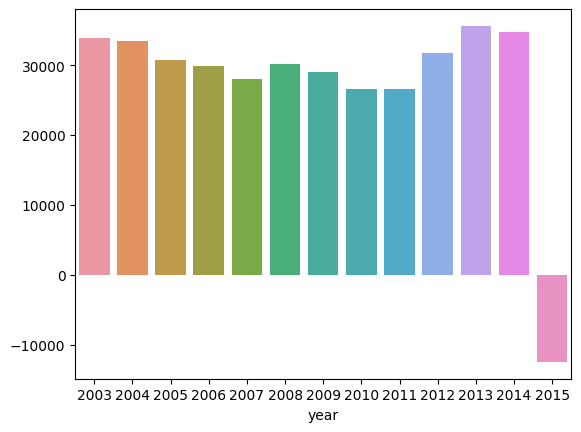

In [32]:
sns.barplot(x=train.groupby('year').size().index, y=train.groupby('year').size().values - 40000)

In [33]:
pd.value_counts(train['month']).sort_index()

month
1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
Name: count, dtype: int64

<Axes: xlabel='month'>

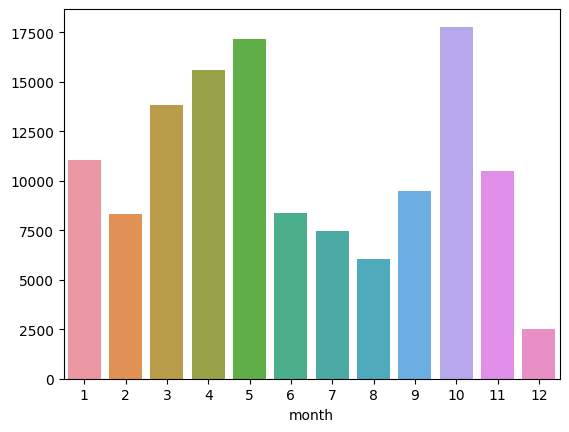

In [34]:
sns.barplot(x=train.groupby('month').size().index, y=train.groupby('month').size().values -62500)

In [35]:
pd.value_counts(train['DayOfWeek'])

DayOfWeek
Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: count, dtype: int64

<Axes: xlabel='dayofweek'>

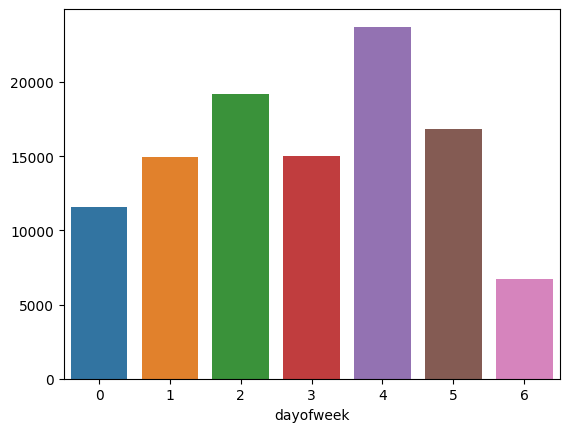

In [36]:
sns.barplot(x=train.groupby('dayofweek').size().index, y=train.groupby('dayofweek').size().values - 110000)

<Axes: xlabel='day'>

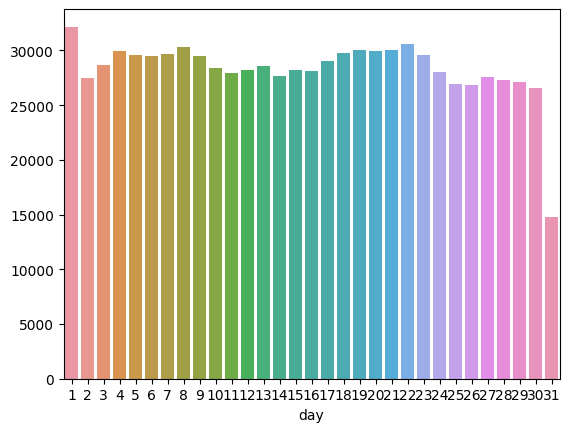

In [37]:
sns.barplot(x=train.groupby('day').size().index, y=train.groupby('day').size().values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'ARSON'),
  Text(1, 0, 'ASSAULT'),
  Text(2, 0, 'BAD CHECKS'),
  Text(3, 0, 'BRIBERY'),
  Text(4, 0, 'BURGLARY'),
  Text(5, 0, 'DISORDERLY CONDUCT'),
  Text(6, 0, 'DRIVING UNDER THE INFLUENCE'),
  Text(7, 0, 'DRUG/NARCOTIC'),
  Text(8, 0, 'DRUNKENNESS'),
  Text(9, 0, 'EMBEZZLEMENT'),
  Text(10, 0, 'EXTORTION'),
  Text(11, 0, 'FAMILY OFFENSES'),
  Text(12, 0, 'FORGERY/COUNTERFEITING'),
  Text(13, 0, 'FRAUD'),
  Text(14, 0, 'GAMBLING'),
  Text(15, 0, 'KIDNAPPING'),
  Text(16, 0, 'LARCENY/THEFT'),
  Text(17, 0, 'LIQUOR LAWS'),
  Text(18, 0, 'LOITERING'),
  Text(19, 0, 'MISSING PERSON'),
  Text(20, 0, 'NON-CRIMINAL'),
  Text(21, 0, 'OTHER OFFENSES'),
  Text(22, 0, 'PORNOGRAPHY/OBSCENE MAT'),
  Text(23, 0, 'PROSTITUTION'),
  Text(24, 0, 'RECOVERED VEHICLE'),
  Text(25, 0, 'ROBBERY'),
  Text(26, 0, '

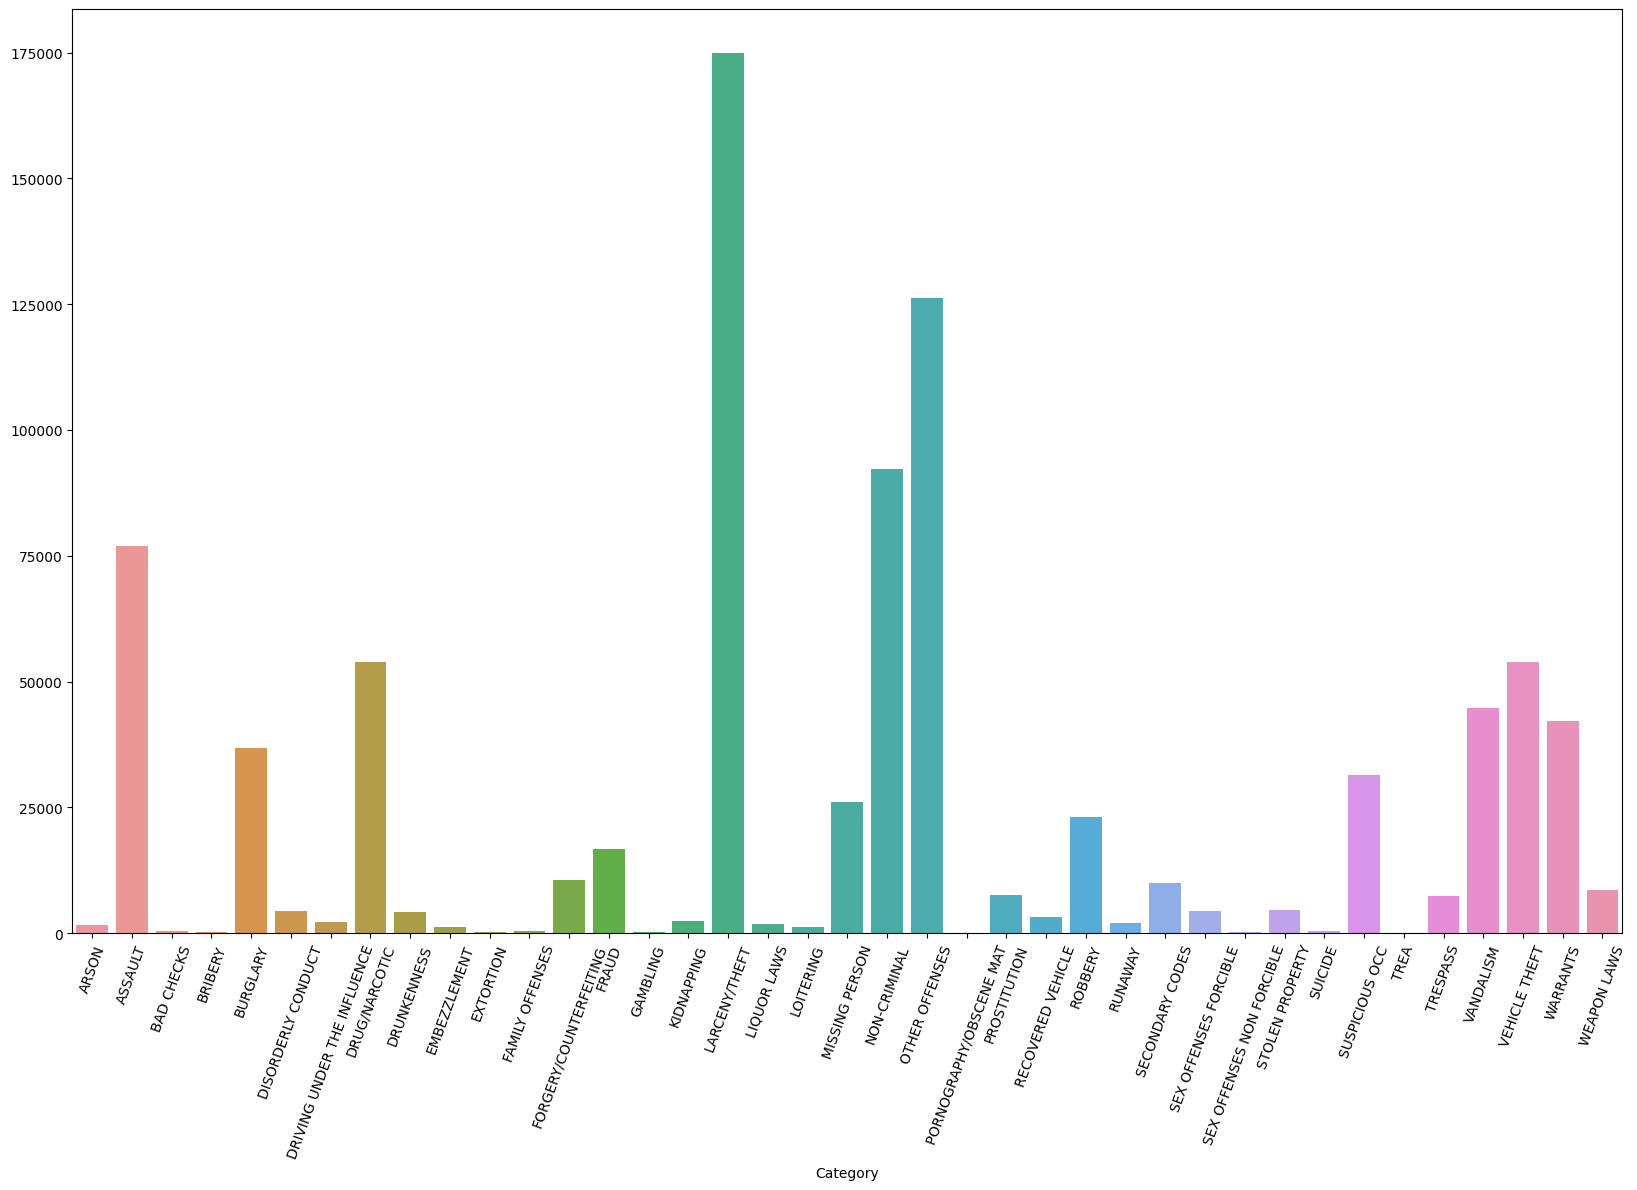

In [38]:
plt.subplots(figsize = (20,12))
sns.barplot(x=train.groupby('Category').size().index, y=train.groupby('Category').size().values)
plt.xticks(rotation=70)